In [1]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 13.3 MB/s eta 0:00:0000:0100:01


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Fréquence')

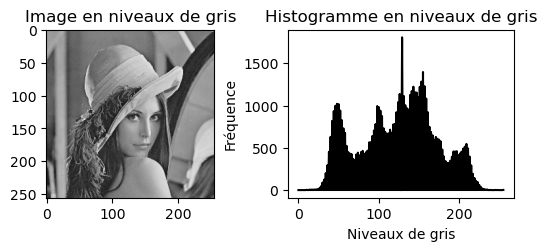

In [2]:

image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)


histogram = cv2.calcHist([image], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image en niveaux de gris')

plt.subplot(2, 2, 2)
plt.plot(histogram, color='black')
plt.title('Histogramme en niveaux de gris')
plt.xlabel('Niveaux de gris')
plt.ylabel('Fréquence')


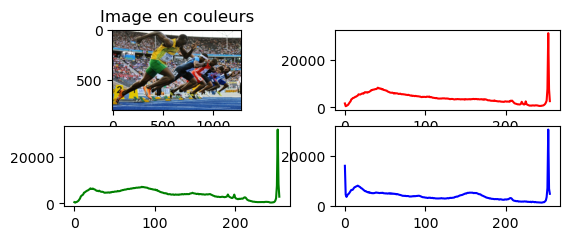

In [54]:
image2 = cv2.imread('image2.jpg')


b, g, r = cv2.split(image2)

hist_r = cv2.calcHist([r], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_g = cv2.calcHist([g], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_b = cv2.calcHist([b], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

hist = cv2.calcHist([image2], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image en couleurs')

plt.subplot(4, 2, 2)
#plt.plot(hist, color='black')
plt.plot(hist_r, color='red')
plt.subplot(4, 2, 3)
plt.plot(hist_g, color='green')
plt.subplot(4, 2, 4)
plt.plot(hist_b, color='blue')

plt.show()


In [39]:
def etirer_histogramme_cv2(image, a, b):

    if(len(image.shape) == 3):
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()

    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    hist_norm = hist / np.sum(hist)

    cdf = np.cumsum(hist_norm)

    image_etiree = np.interp(gray_image, np.arange(256), (b - a)*(cdf - cdf[a])/(cdf[b] - cdf[a])+a)
    image_etiree = np.uint8(image_etiree)

    hist_etire = cv2.calcHist([image_etiree], [0], None, [256], [25, 230])


    return image_etiree, hist_etire, hist

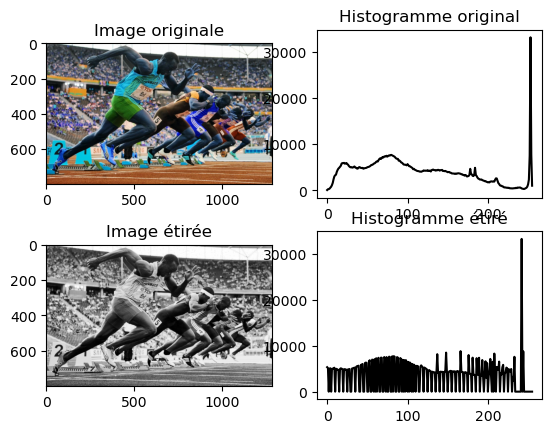

In [55]:
image = cv2.imread("image.png")

image_etiree, hist_norm, hist = etirer_histogramme_cv2(image, 50, 200)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')

plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogramme original')

plt.subplot(2, 2, 3)
plt.imshow(image_etiree, cmap='gray')
plt.title('Image étirée')

plt.subplot(2, 2, 4)
plt.plot(hist_norm, color='black')
plt.title('Histogramme étiré')

plt.show()


In [43]:
def etirer_histogramme(image, a, b):
    if len(image.shape) == 3:
        gray_image = [[sum(pixel) // 3 for pixel in row] for row in image]
    else:
        gray_image = [row.copy() for row in image]

    hist = [0] * 256
    for row in gray_image:
        for pixel_value in row:
            hist[pixel_value] += 1

    total_pixels = sum(hist)
    hist_norm = [value / total_pixels for value in hist]

    cdf = [sum(hist_norm[:i + 1]) for i in range(256)]

    image_etiree = [[int((b - a) * (cdf[pixel_value] - cdf[a]) / (cdf[b] - cdf[a]) + a) for pixel_value in row]
                    for row in gray_image]

    hist_etire = [0] * 256
    for row in image_etiree:
        for pixel_value in row:
            hist_etire[pixel_value] += 1

    return image_etiree, hist_etire, hist


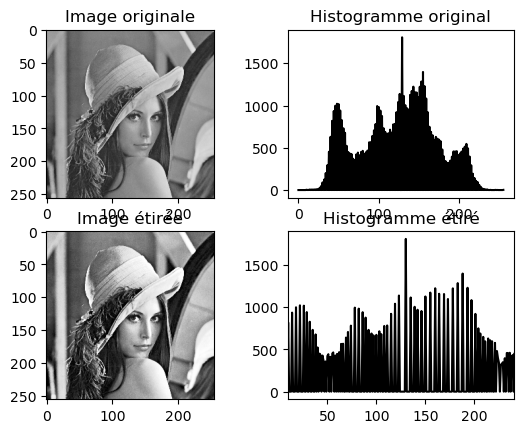

In [63]:
image_etiree, hist_norm, hist = etirer_histogramme(image, 0, 255)



plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')

plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogramme original')

plt.subplot(2, 2, 3)
plt.imshow(image_etiree, cmap='gray')
plt.title('Image étirée')

plt.subplot(2, 2, 4)
plt.plot(hist_norm, color='black')
plt.xlim([10, 240])
plt.title('Histogramme étiré')

plt.show()


In [60]:
def egaliser_histogramme_cv2(image):

    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()

    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    hist_cumsum = np.cumsum(hist) / np.sum(hist)

    image_egalisee = (2**8 - 1) * hist_cumsum[gray_image]

    image_egalisee = np.uint8(image_egalisee)

    hist_egalise = cv2.calcHist([image_egalisee], [0], None, [256], [0, 256])

    return image_egalisee, hist_egalise, hist


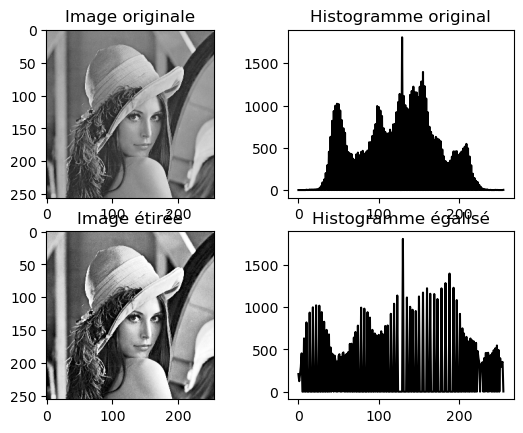

In [61]:
image = cv2.imread("image.png")

image_egalisee, hist_egalise, hist = egaliser_histogramme_cv2(image)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image originale')

plt.subplot(2, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogramme original')

plt.subplot(2, 2, 3)
plt.imshow(image_egalisee, cmap='gray')
plt.title('Image étirée')

plt.subplot(2, 2, 4)
plt.plot(hist_egalise, color='black')
plt.title('Histogramme égalisé')

plt.show()
